In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib
import geopandas
from scipy import stats
import seaborn as sns
import matplotlib.patches as mpl_patches
import matplotlib as mpl

In [2]:
mpl.rcParams['axes.labelsize']

'medium'

In [3]:
pd.options.display.max_columns = 100

In [4]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/notebooks/Casey'

In [5]:
# Per species:
# Day ~ Temperature + (Temperature | Cell)

In [6]:
path = '/Users/alvastrand/Downloads/linear_mixed_modeling/mean_arrival_day_temperature/coefficients/'

os.chdir(path)

In [7]:
os.getcwd()

'/Users/alvastrand/Downloads/linear_mixed_modeling/mean_arrival_day_temperature/coefficients'

In [8]:
filename = 'coefficients_mean_arrival_day_temperature.csv'

df_coeffs_lmer = pd.read_csv(filename)
print(df_coeffs_lmer.shape)

df_coeffs_lmer.head(2)

(450, 4)


,species,cell,slope,intercept
0,Antrostomus_carolinensis,19,-1.749315,101.853281
1,Antrostomus_carolinensis,45,-0.959714,105.110310


In [9]:
os.getcwd()

'/Users/alvastrand/Downloads/linear_mixed_modeling/mean_arrival_day_temperature/coefficients'

In [10]:
path = '/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output/'

os.chdir(path)

In [11]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output'

In [12]:
filename = 'aerial_insectivores_migration_distances_mean_weighted_body_masses.csv'

df_common_names = pd.read_csv(filename)
print(df_common_names.shape)

df_common_names.head(2)

(19, 26)


,scientific_name,LON.b,LAT.b,LON.nb,LAT.nb,MAX.LAT.nb,distance,intersect,id,avibase id,rank,common_name,french_name,order,family,subfamily,genus,annotation,status_accidental,status_hawaiian,status_introduced,status_nonbreeding,status_extinct,status_misplaced,order_birds_of_north_america,body_mass
0,Aeronautes saxatalis,-108.698701,32.448050,-105.931063,26.265097,39.513228,736.046352,0.586364,755,B401C2DDB3ED732D,species,White-throated Swift,Martinet à gorge blanche,Apodiformes,Apodidae,Apodinae,Aeronautes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes,32.1
1,Antrostomus carolinensis,-88.058904,34.063816,-83.140011,16.459749,30.354784,2011.374172,0.049623,718,8D3E887123F5C670,species,Chuck-will's-widow,Engoulevent de Caroline,Caprimulgiformes,Caprimulgidae,Caprimulginae,Antrostomus,Monotypic.,NaN,NaN,NaN,NaN,NaN,NaN,Caprimulgiformes,109.0


In [13]:
df_common_names = df_common_names[['scientific_name', 'common_name']]
print(df_common_names.shape)

df_common_names.head(2)

(19, 2)


,scientific_name,common_name
0,Aeronautes saxatalis,White-throated Swift
1,Antrostomus carolinensis,Chuck-will's-widow


In [14]:
# Per cell:
# Temperature ~ Year

In [15]:
path = '/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output/'

os.chdir(path)

In [16]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/data/output'

In [17]:
filename = 'betas_temperature_year_ols.csv'

df_temp_change = pd.read_csv(filename)
print(df_temp_change.shape)

df_temp_change.head(2)

(182, 8)


,cell,slope_temp_change_all_years,standard_error_temp_change_all_years,intercept_temp_change_all_years,p_value_temp_change_all_years,r_squared_temp_change_all_years,lower_conf_int_temp_change_all_years,upper_conf_int_temp_change_all_years
0,0,0.047530,0.039869,-74.496379,0.250578,0.081582,-0.036988,0.132049
1,1,0.050006,0.037956,-79.129506,0.206236,0.097866,-0.030457,0.130469


In [18]:
# Per cell:
# Temperature ~ Year
# Range of years

In [19]:
path = '/Users/alvastrand/Downloads/states_21basic/'

os.chdir(path)

In [20]:
os.getcwd()

'/Users/alvastrand/Downloads/states_21basic'

In [21]:
filename = 'aerial_insectivores_betas_temperature_year_years_ols.csv'

df_temp_change_years = pd.read_csv(filename)
print(df_temp_change_years.shape)

df_temp_change_years.head(2)

(450, 11)


,species,cell,earliest_year,latest_year,slope_temp_year_years,standard_error_temp_year_years,intercept_temp_year_years,p_value_temp_year_years,r_squared_temp_year_years,lower_conf_int_temp_year_years,upper_conf_int_temp_year_years
0,Antrostomus_carolinensis,19,2010,2017,0.310525,0.185129,-610.402682,0.144486,0.319225,-0.142469,0.763518
1,Antrostomus_carolinensis,45,2014,2019,0.303084,0.143583,-600.626366,0.102391,0.526948,-0.095567,0.701736


In [22]:
# Per species:
# Temperature ~ Year + (Year | Cell)
# Range of years?

In [23]:
path = '/Users/alvastrand/Downloads/linear_mixed_modeling/temperature_year/coefficients/'

os.chdir(path)

In [24]:
os.getcwd()

'/Users/alvastrand/Downloads/linear_mixed_modeling/temperature_year/coefficients'

In [25]:
filename = 'coefficients_temperature_year.csv'

df_temp_change_lmer = pd.read_csv(filename)

print(df_temp_change_lmer.shape)

df_temp_change_lmer.head(2)

(182, 3)


,cell,slope,intercept
0,0,0.038108,-55.566823
1,1,0.038259,-55.527943


In [26]:
df_temp_change_lmer = df_temp_change_lmer.rename(columns={'slope': 'slope_temp_change_lmer', 
                                                     'intercept': 'intercept_temp_change_lmer'})
print(df_temp_change_lmer.shape)

df_temp_change_lmer.head(2)

(182, 3)


,cell,slope_temp_change_lmer,intercept_temp_change_lmer
0,0,0.038108,-55.566823
1,1,0.038259,-55.527943


In [27]:
df_comparison = df_temp_change.merge(df_temp_change_lmer, on='cell')
print(df_comparison.shape)

df_comparison.head(2)

(182, 10)


,cell,slope_temp_change_all_years,standard_error_temp_change_all_years,intercept_temp_change_all_years,p_value_temp_change_all_years,r_squared_temp_change_all_years,lower_conf_int_temp_change_all_years,upper_conf_int_temp_change_all_years,slope_temp_change_lmer,intercept_temp_change_lmer
0,0,0.047530,0.039869,-74.496379,0.250578,0.081582,-0.036988,0.132049,0.038108,-55.566823
1,1,0.050006,0.037956,-79.129506,0.206236,0.097866,-0.030457,0.130469,0.038259,-55.527943


-0.09761216696758983
0.12093667528553893


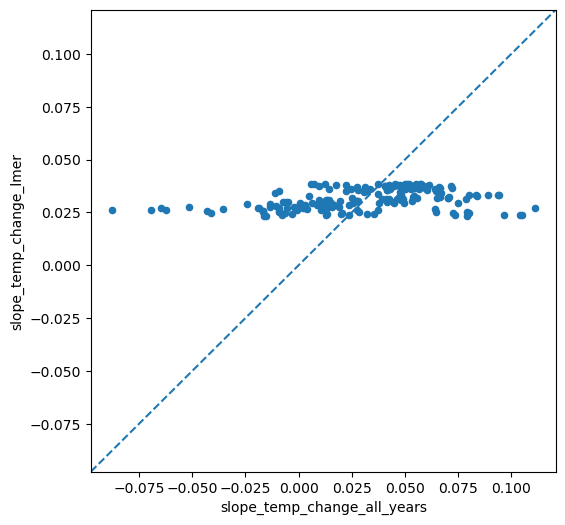

In [28]:
fig, ax = plt.subplots(figsize=(6, 6))

df_comparison.plot.scatter(x='slope_temp_change_all_years', y='slope_temp_change_lmer', ax=ax)

low_x, high_x = ax.get_xlim()
# print(low_x, high_x)

low_y, high_y = ax.get_ylim()
# print(low_y, high_y)

low = min(low_x, low_y)
print(low)

high = max(high_x, high_y)
print(high)

ax.set_xlim(low, high)
ax.set_ylim(low, high)

ax.plot([0, 1], [0, 1], linestyle='dashed', transform=ax.transAxes)

plt.show()

-246.80221562200194
190.04023441768496


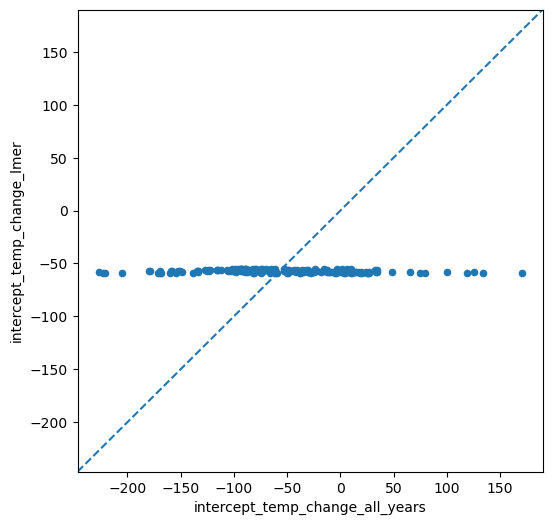

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))

df_comparison.plot.scatter(x='intercept_temp_change_all_years', y='intercept_temp_change_lmer', ax=ax)

low_x, high_x = ax.get_xlim()
# print(low_x, high_x)

low_y, high_y = ax.get_ylim()
# print(low_y, high_y)

low = min(low_x, low_y)
print(low)

high = max(high_x, high_y)
print(high)

ax.set_xlim(low, high)
ax.set_ylim(low, high)

ax.plot([0, 1], [0, 1], linestyle='dashed', transform=ax.transAxes)

plt.show()

In [30]:
df_sens_temp_change = df_coeffs_lmer.merge(df_temp_change, on='cell')
print(df_sens_temp_change.shape)

df_sens_temp_change.head(2)

(450, 11)


,species,cell,slope,intercept,slope_temp_change_all_years,standard_error_temp_change_all_years,intercept_temp_change_all_years,p_value_temp_change_all_years,r_squared_temp_change_all_years,lower_conf_int_temp_change_all_years,upper_conf_int_temp_change_all_years
0,Antrostomus_carolinensis,19,-1.749315,101.853281,0.060397,0.062364,-106.61285,0.347229,0.055373,-0.071809,0.192604
1,Chaetura_pelagica,19,-0.277597,107.545694,0.060397,0.062364,-106.61285,0.347229,0.055373,-0.071809,0.192604


In [31]:
df_sens_temp_change = df_sens_temp_change.rename(columns={'species': 'scientific_name'})

df_sens_temp_change['scientific_name'] = df_sens_temp_change['scientific_name'].str.replace('_', ' ')

print(df_sens_temp_change.shape)

df_sens_temp_change.head(2)

(450, 11)


,scientific_name,cell,slope,intercept,slope_temp_change_all_years,standard_error_temp_change_all_years,intercept_temp_change_all_years,p_value_temp_change_all_years,r_squared_temp_change_all_years,lower_conf_int_temp_change_all_years,upper_conf_int_temp_change_all_years
0,Antrostomus carolinensis,19,-1.749315,101.853281,0.060397,0.062364,-106.61285,0.347229,0.055373,-0.071809,0.192604
1,Chaetura pelagica,19,-0.277597,107.545694,0.060397,0.062364,-106.61285,0.347229,0.055373,-0.071809,0.192604


In [32]:
df_sens_temp_change = df_sens_temp_change.merge(df_common_names, on='scientific_name')
print(df_sens_temp_change.shape)

df_sens_temp_change.head(2)

(450, 12)


,scientific_name,cell,slope,intercept,slope_temp_change_all_years,standard_error_temp_change_all_years,intercept_temp_change_all_years,p_value_temp_change_all_years,r_squared_temp_change_all_years,lower_conf_int_temp_change_all_years,upper_conf_int_temp_change_all_years,common_name
0,Antrostomus carolinensis,19,-1.749315,101.853281,0.060397,0.062364,-106.612850,0.347229,0.055373,-0.071809,0.192604,Chuck-will's-widow
1,Antrostomus carolinensis,45,-0.959714,105.110310,0.094084,0.053247,-179.479664,0.096304,0.163271,-0.018794,0.206962,Chuck-will's-widow


In [33]:
df_sens_temp_change_years = df_coeffs_lmer.merge(df_temp_change_years, on=['species', 'cell'])
print(df_sens_temp_change_years.shape)

df_sens_temp_change_years.head(2)

(450, 13)


,species,cell,slope,intercept,earliest_year,latest_year,slope_temp_year_years,standard_error_temp_year_years,intercept_temp_year_years,p_value_temp_year_years,r_squared_temp_year_years,lower_conf_int_temp_year_years,upper_conf_int_temp_year_years
0,Antrostomus_carolinensis,19,-1.749315,101.853281,2010,2017,0.310525,0.185129,-610.402682,0.144486,0.319225,-0.142469,0.763518
1,Antrostomus_carolinensis,45,-0.959714,105.110310,2014,2019,0.303084,0.143583,-600.626366,0.102391,0.526948,-0.095567,0.701736


In [34]:
df_sens_temp_change_years = df_sens_temp_change_years.rename(columns={'species': 'scientific_name'})

df_sens_temp_change_years['scientific_name'] = df_sens_temp_change_years['scientific_name'].str.replace('_', ' ')

print(df_sens_temp_change_years.shape)

df_sens_temp_change_years.head(2)

(450, 13)


,scientific_name,cell,slope,intercept,earliest_year,latest_year,slope_temp_year_years,standard_error_temp_year_years,intercept_temp_year_years,p_value_temp_year_years,r_squared_temp_year_years,lower_conf_int_temp_year_years,upper_conf_int_temp_year_years
0,Antrostomus carolinensis,19,-1.749315,101.853281,2010,2017,0.310525,0.185129,-610.402682,0.144486,0.319225,-0.142469,0.763518
1,Antrostomus carolinensis,45,-0.959714,105.110310,2014,2019,0.303084,0.143583,-600.626366,0.102391,0.526948,-0.095567,0.701736


In [35]:
df_sens_temp_change_years = df_sens_temp_change_years.merge(df_common_names, on='scientific_name')
print(df_sens_temp_change_years.shape)

df_sens_temp_change_years.head(2)

(450, 14)


,scientific_name,cell,slope,intercept,earliest_year,latest_year,slope_temp_year_years,standard_error_temp_year_years,intercept_temp_year_years,p_value_temp_year_years,r_squared_temp_year_years,lower_conf_int_temp_year_years,upper_conf_int_temp_year_years,common_name
0,Antrostomus carolinensis,19,-1.749315,101.853281,2010,2017,0.310525,0.185129,-610.402682,0.144486,0.319225,-0.142469,0.763518,Chuck-will's-widow
1,Antrostomus carolinensis,45,-0.959714,105.110310,2014,2019,0.303084,0.143583,-600.626366,0.102391,0.526948,-0.095567,0.701736,Chuck-will's-widow


In [36]:
df_temp_change_lmer.head(2)

,cell,slope_temp_change_lmer,intercept_temp_change_lmer
0,0,0.038108,-55.566823
1,1,0.038259,-55.527943


In [37]:
df_sens_temp_change_lmer = df_coeffs_lmer.merge(df_temp_change_lmer, on='cell')
print(df_sens_temp_change_lmer.shape)

df_sens_temp_change_lmer.head(2)

(450, 6)


,species,cell,slope,intercept,slope_temp_change_lmer,intercept_temp_change_lmer
0,Antrostomus_carolinensis,19,-1.749315,101.853281,0.035354,-56.272521
1,Chaetura_pelagica,19,-0.277597,107.545694,0.035354,-56.272521


In [38]:
df_sens_temp_change_lmer = df_sens_temp_change_lmer.rename(columns={'species': 'scientific_name'})

df_sens_temp_change_lmer['scientific_name'] = df_sens_temp_change_lmer['scientific_name'].str.replace('_', ' ')

print(df_sens_temp_change_lmer.shape)

df_sens_temp_change_lmer.head(2)

(450, 6)


,scientific_name,cell,slope,intercept,slope_temp_change_lmer,intercept_temp_change_lmer
0,Antrostomus carolinensis,19,-1.749315,101.853281,0.035354,-56.272521
1,Chaetura pelagica,19,-0.277597,107.545694,0.035354,-56.272521


In [39]:
df_sens_temp_change_lmer = df_sens_temp_change_lmer.merge(df_common_names, on='scientific_name')
print(df_sens_temp_change_lmer.shape)

df_sens_temp_change_lmer.head(2)

(450, 7)


,scientific_name,cell,slope,intercept,slope_temp_change_lmer,intercept_temp_change_lmer,common_name
0,Antrostomus carolinensis,19,-1.749315,101.853281,0.035354,-56.272521,Chuck-will's-widow
1,Antrostomus carolinensis,45,-0.959714,105.110310,0.033089,-56.853124,Chuck-will's-widow


In [40]:
list_species_names = list(sorted(df_sens_temp_change['scientific_name'].unique()))
print(len(list_species_names))
print(list_species_names)

10
['Antrostomus carolinensis', 'Antrostomus vociferus', 'Chaetura pelagica', 'Chordeiles minor', 'Hirundo rustica', 'Petrochelidon pyrrhonota', 'Progne subis', 'Riparia riparia', 'Stelgidopteryx serripennis', 'Tachycineta bicolor']


In [41]:
def run_ols_regression(df, predictor_variable, column_name, species, left_xlim, right_xlim, left_ylim, right_ylim):
    
    common_name = df['common_name'].unique()[0]

    model_ols = smf.ols(formula=column_name + ' ~ ' + predictor_variable, data=df)

    res_ols = model_ols.fit()
    
    print(res_ols.summary())
    
    slope = res_ols.params[1]
#     print(slope)

    standard_error = res_ols.bse.iloc[1]
    
    intercept = res_ols.params[0]
#     print(intercept)

    r_squared = res_ols.rsquared
#     print(r_squared)

    p_value = res_ols.pvalues[1]
#     print(p_value)
    
    conf_int = [res_ols.conf_int().iloc[1].iloc[0], res_ols.conf_int().iloc[1].iloc[1]]
    
    lower_conf_int = conf_int[0]
    
    upper_conf_int = conf_int[1]
    
    g = sns.lmplot(data=df, x=predictor_variable, y=column_name)
    
#     line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope, intercept)}
        
    for ax in g.axes.flat:
        
        print(ax.get_xlim())
        print(ax.get_ylim())
        
#     g.set(ylim=(left_ylim, right_ylim))
        
    g.set(xlim=(left_xlim, right_xlim), ylim=(left_ylim, right_ylim))
    
    for ax in g.axes.flat:
        
        print(ax.get_xlim())
        print(ax.get_ylim())
        
    plt.axhline(y=0, color='0.8', linestyle='--')
    
    handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 3
    
    labels = []
    
    labels.append('beta = {0:.3g} \u00B1 {1:.3g}'.format(slope, standard_error))
    
    if p_value < 0.001:
        labels.append("P < 0.001")
    else:
        labels.append("P = {0:.3g}".format(p_value))
        
    labels.append("R^2 = {0:.3g}".format(r_squared))
    
    plt.legend(handles, labels, loc='best', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)
        
#     fontsize
                
    plt.xlabel('Air temperature change over time (°C/year)')
    
    plt.ylabel('Sensitivity (Julian days/°C)')
    
#     plt.title(common_name)
    
#     plt.show()

    print(g.figure.get_size_inches())
    
    plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/sensitivity_temperature_year/' + common_name + '.pdf', 
                bbox_inches='tight')
    
    return common_name, slope, p_value, lower_conf_int, upper_conf_int

In [110]:
def test_function(df, predictor_variable, column_name, species, left_xlim, right_xlim, left_ylim, right_ylim):
    
    mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.spines.top'] = False
    mpl.rcParams['axes.spines.bottom'] = False
    
    common_name = df['common_name'].unique()[0]

    model_ols = smf.ols(formula=column_name + ' ~ ' + predictor_variable, data=df)

    res_ols = model_ols.fit()
    
    print(res_ols.summary())
    
    slope = res_ols.params[1]
#     print(slope)

    standard_error = res_ols.bse.iloc[1]
    
    intercept = res_ols.params[0]
#     print(intercept)

    r_squared = res_ols.rsquared
#     print(r_squared)

    p_value = res_ols.pvalues[1]
#     print(p_value)
    
    conf_int = [res_ols.conf_int().iloc[1].iloc[0], res_ols.conf_int().iloc[1].iloc[1]]
    
    lower_conf_int = conf_int[0]
    
    upper_conf_int = conf_int[1]
    
    fig, ax = plt.subplots(figsize=(4.76*1.5, 4.76))
        
    plt.subplots_adjust(right=0.8)
        
    plot = sns.regplot(data=df, x=predictor_variable, y=column_name, ax=ax)
    
    plot.remove()
    
#     ax.spines[['right', 'top']].set_visible(False)
    
    plt.tick_params(labelsize=14)
    
    plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False, labelsize=16)
    
#     line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope, intercept)}
        
#     for ax in g.axes.flat:
        
#         print(ax.get_xlim())
#         print(ax.get_ylim())
    
    ax.set_xlim(left_xlim, right_xlim)
    ax.set_ylim(left_ylim, right_ylim)
    
#     for ax in g.axes.flat:
        
#         print(ax.get_xlim())
#         print(ax.get_ylim())
        
#     plt.axhline(y=0, color='0.8', linestyle='--')
    
#     plt.axvline(x=0, color='0.8', linestyle='--')
    
    handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 3
    
    labels = []
    
    labels.append('$\u03B2$ = {0:.3g} \u00B1 {1:.3g}'.format(slope, standard_error))
    
    if p_value < 0.001:
        labels.append("$P$ < 0.001")
    else:
        labels.append("$P$ = {0:.3g}".format(p_value))
        
    labels.append("$R^2$ = {0:.3g}".format(r_squared))
    
#     plt.legend(handles, labels, loc='best', 
#           fancybox=True, framealpha=0.8, 
#           handlelength=0, handletextpad=0, fontsize=14)

#     plot.set(xlabel=None)

    plt.xticks([-0.05, 0, 0.05])
                
    plt.xlabel('Air temperature change over time (°C/year)', fontsize=16)
    
    plt.ylabel('Sensitivity (Julian days/°C)', fontsize=16)
    
    plt.title(common_name, fontsize=18)
    
#     plt.tight_layout()
    
#     plt.show()
    
#     print(g.figure.get_size_inches())
    
    plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/sensitivity_temperature_year/' + common_name + '_test' + '.pdf', 
                bbox_inches='tight')
    
#     plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/sensitivity_temperature_year/' + common_name + '_test' + '.svg', 
#                 bbox_inches='tight')
    
    return common_name, slope, p_value, r_squared, lower_conf_int, upper_conf_int

In [43]:
# for species in list_species_names:
    
#     print(species)
    
#     left_ylim = df_sens_temp_change['slope'].min()
# #     print(left_ylim)

#     right_ylim = df_sens_temp_change['slope'].max()
# #     print(right_ylim)
    
#     df_species = df_sens_temp_change[df_sens_temp_change['scientific_name'] == species]
    
#     predictor_variable = 'slope_temp_change_all_years'

#     column_name = 'slope'

#     run_ols_regression(df_species, predictor_variable, column_name, species, left_ylim, right_ylim)

In [44]:
left_ylim = df_sens_temp_change_lmer['slope'].min()
print(left_ylim)

right_ylim = df_sens_temp_change_lmer['slope'].max()
print(right_ylim)

left_xlim = df_sens_temp_change_lmer['slope_temp_change_lmer'].min()
print(left_xlim)

right_xlim = df_sens_temp_change_lmer['slope_temp_change_lmer'].max()
print(right_xlim)

-1.74931474675599
1.06180419178181
0.0242735638409362
0.0375774678175229


In [45]:
# list_common_names = []
# list_slopes = []
# list_p_values = []
# list_lower_conf_ints = []
# list_upper_conf_ints = []

# for species in list_species_names:
    
#     print(species)
    
#     df_species = df_sens_temp_change_lmer[df_sens_temp_change_lmer['scientific_name'] == species]
    
# #     print(df_species['slope'].min())
# #     print(df_species['slope'].max())
    
#     print(df_species['slope_temp_change_lmer'].min())
#     print(df_species['slope_temp_change_lmer'].max())
    
#     # Tree Swallow
#     left_xlim = 0.023949626088802505
    
#     # Barn Swallow
#     right_xlim = 0.03820387900887928
    
#     # Space?
    
#     left_ylim = -2.343200965850084
#     right_ylim = 1.2239472945261858

#     predictor_variable = 'slope_temp_change_lmer'

#     column_name = 'slope'

#     common_name, slope, p_value, lower_conf_int, upper_conf_int = run_ols_regression(df_species, 
#                                                                                      predictor_variable, 
#                                                                                      column_name, 
#                                                                                      species, 
#                                                                                      left_xlim, 
#                                                                                      right_xlim, 
#                                                                                      left_ylim, 
#                                                                                      right_ylim)
    
#     list_common_names.append(common_name)
#     list_slopes.append(slope)
#     list_p_values.append(p_value)
#     list_lower_conf_ints.append(lower_conf_int)
#     list_upper_conf_ints.append(upper_conf_int)

In [46]:
# list_common_names = []
# list_slopes = []
# list_p_values = []
# list_r_squared = []
# list_lower_conf_ints = []
# list_upper_conf_ints = []

# for species in list_species_names:
    
#     print(species)
    
#     df_species = df_sens_temp_change_lmer[df_sens_temp_change_lmer['scientific_name'] == species]
    
# #     print(df_species['slope'].min())
# #     print(df_species['slope'].max())
    
#     print(df_species['slope_temp_change_lmer'].min())
#     print(df_species['slope_temp_change_lmer'].max())
    
#     # Tree Swallow
#     left_xlim = 0.023949626088802505
    
#     # Barn Swallow
#     right_xlim = 0.03820387900887928
    
#     # Space?
    
#     left_ylim = -2.343200965850084
#     right_ylim = 1.2239472945261858

#     predictor_variable = 'slope_temp_change_lmer'

#     column_name = 'slope'

#     common_name, slope, p_value, r_squared, lower_conf_int, upper_conf_int = test_function(df_species, 
#                                                                                      predictor_variable, 
#                                                                                      column_name, 
#                                                                                      species, 
#                                                                                      left_xlim, 
#                                                                                      right_xlim, 
#                                                                                      left_ylim, 
#                                                                                      right_ylim)
    
#     list_common_names.append(common_name)
#     list_slopes.append(slope)
#     list_p_values.append(p_value)
#     list_r_squared.append(r_squared)
#     list_lower_conf_ints.append(lower_conf_int)
#     list_upper_conf_ints.append(upper_conf_int)

Antrostomus carolinensis
-1.74931474675599
1.06180419178181
-0.0074503057010593
0.0940837947221761
-0.0876781286833567
0.0940837947221761
-1.74931474675599
1.06180419178181
                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     32.08
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           1.85e-05
Time:                        15:00:14   Log-Likelihood:                -11.815
No. Observations:                  21   AIC:                             27.63
Df Residuals:                      19   BIC:                             29.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coe

Hirundo rustica
-0.544101307863075
-0.0213640847876596
-0.0876781286833567
0.0940837947221761
-0.0876781286833567
0.0940837947221761
-1.74931474675599
1.06180419178181
                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     88.20
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           4.46e-14
Time:                        15:00:15   Log-Likelihood:                 78.472
No. Observations:                  73   AIC:                            -152.9
Df Residuals:                      71   BIC:                            -148.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    

Stelgidopteryx serripennis
-0.921426234168879
-0.0189704593695323
-0.0876781286833567
0.0940837947221761
-0.0876781286833567
0.0940837947221761
-1.74931474675599
1.06180419178181
                            OLS Regression Results                            
Dep. Variable:                  slope   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     79.99
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           8.10e-13
Time:                        15:00:17   Log-Likelihood:                 19.907
No. Observations:                  65   AIC:                            -35.81
Df Residuals:                      63   BIC:                            -31.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               

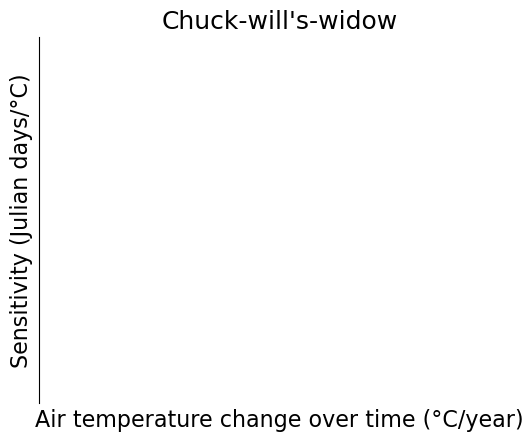

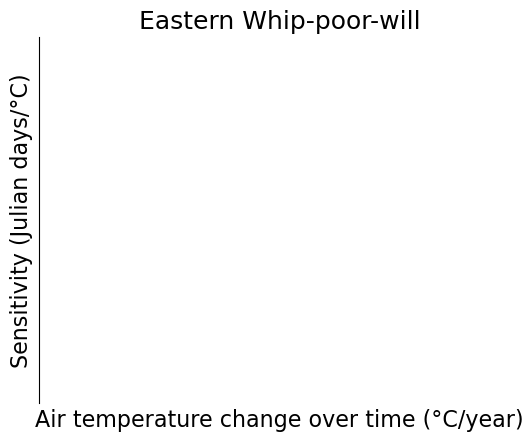

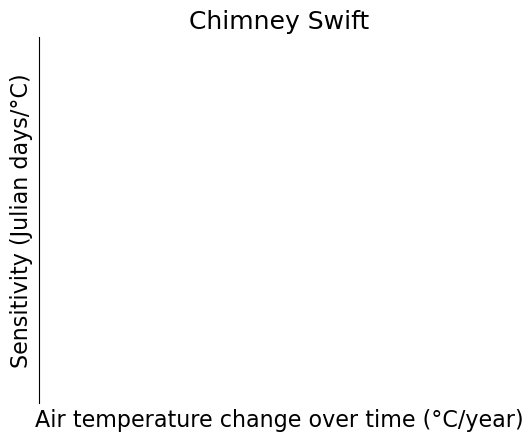

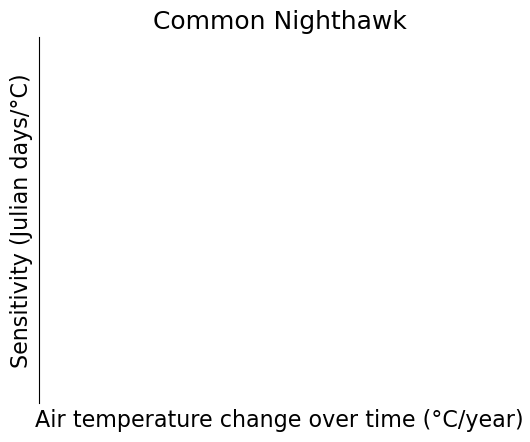

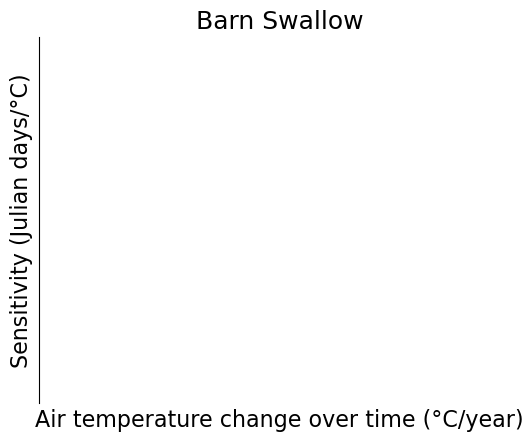

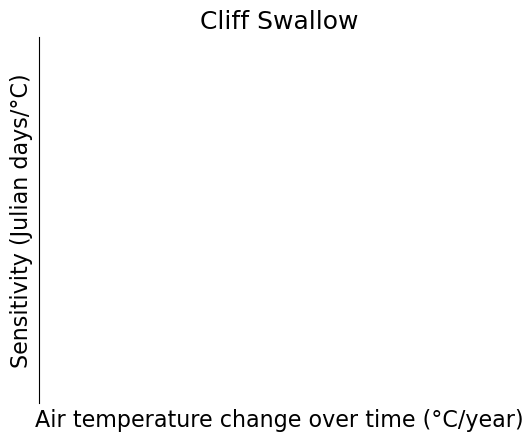

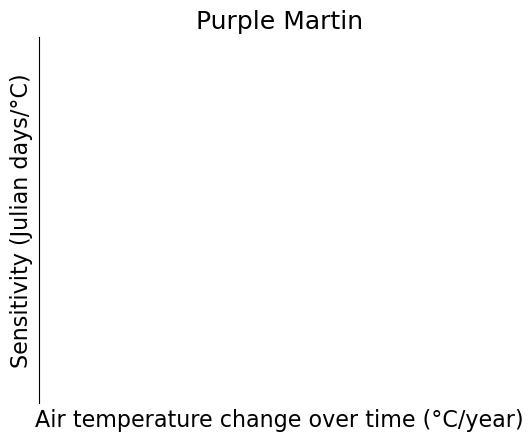

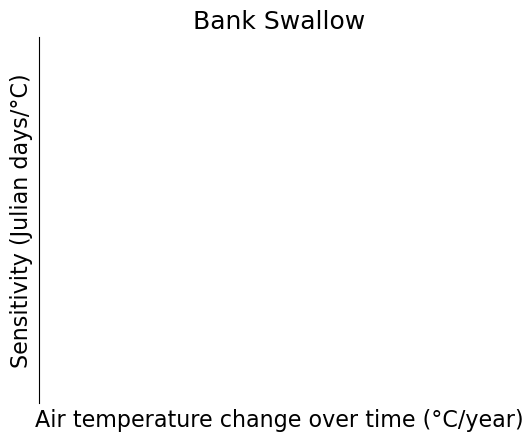

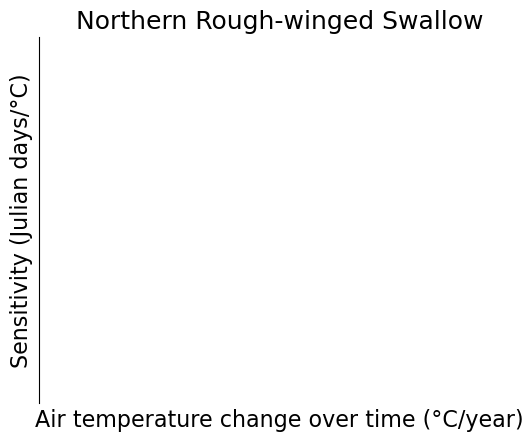

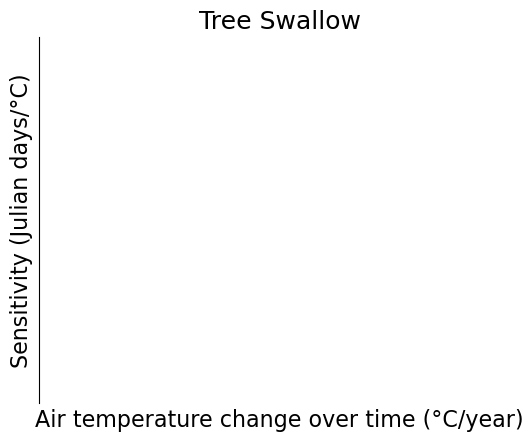

In [111]:
list_common_names = []
list_slopes = []
list_p_values = []
list_r_squared = []
list_lower_conf_ints = []
list_upper_conf_ints = []

for species in list_species_names:
    
    print(species)
    
    df_species = df_sens_temp_change[df_sens_temp_change['scientific_name'] == species]
    
    print(df_species['slope'].min())
    print(df_species['slope'].max())
    
    print(df_species['slope_temp_change_all_years'].min())
    print(df_species['slope_temp_change_all_years'].max())

    left_xlim = df_sens_temp_change['slope_temp_change_all_years'].min()
    print(left_xlim)

    right_xlim = df_sens_temp_change['slope_temp_change_all_years'].max()
    print(right_xlim)
    
    left_ylim = df_sens_temp_change['slope'].min()
    print(left_ylim)

    right_ylim = df_sens_temp_change['slope'].max()
    print(right_ylim)

    predictor_variable = 'slope_temp_change_all_years'

    column_name = 'slope'

    common_name, slope, p_value, r_squared, lower_conf_int, upper_conf_int = test_function(df_species, 
                                                                                     predictor_variable, 
                                                                                     column_name, 
                                                                                     species, 
                                                                                     left_xlim, 
                                                                                     right_xlim, 
                                                                                     left_ylim, 
                                                                                     right_ylim)
    
    list_common_names.append(common_name)
    list_slopes.append(slope)
    list_p_values.append(p_value)
    list_r_squared.append(r_squared)
    list_lower_conf_ints.append(lower_conf_int)
    list_upper_conf_ints.append(upper_conf_int)

In [48]:
df_betas_sens_temp = pd.DataFrame(data={'scientific_name': list_species_names, 'common_name': list_common_names, 
                                        'slope': list_slopes, 'p_value': list_p_values, 'r_squared': list_r_squared, 
                                        'lower_conf_int': list_lower_conf_ints, 
                                        'upper_conf_int': list_upper_conf_ints})
print(df_betas_sens_temp.shape)

df_betas_sens_temp

(10, 7)


,scientific_name,common_name,slope,p_value,r_squared,lower_conf_int,upper_conf_int
0,Antrostomus carolinensis,Chuck-will's-widow,-19.268854,1.845393e-05,0.628034,-26.389402,-12.148307
1,Antrostomus vociferus,Eastern Whip-poor-will,-3.339671,2.723030e-05,0.558331,-4.653013,-2.026330
2,Chaetura pelagica,Chimney Swift,-3.675902,3.833710e-16,0.625401,-4.364329,-2.987475
3,Chordeiles minor,Common Nighthawk,-4.003891,1.892638e-06,0.491861,-5.422257,-2.585524
4,Hirundo rustica,Barn Swallow,-2.396291,4.459768e-14,0.554012,-2.905064,-1.887517
5,Petrochelidon pyrrhonota,Cliff Swallow,-1.800153,2.030538e-07,0.486372,-2.383612,-1.216694
6,Progne subis,Purple Martin,2.251470,2.361924e-04,0.340116,1.140786,3.362153
7,Riparia riparia,Bank Swallow,0.088349,9.488554e-01,0.000155,-2.711590,2.888288
8,Stelgidopteryx serripennis,Northern Rough-winged Swallow,-5.592324,8.103959e-13,0.559409,-6.841849,-4.342799
9,Tachycineta bicolor,Tree Swallow,-0.503988,1.204566e-01,0.045740,-1.144573,0.136596


In [49]:
df_betas_sens_temp_sorted = df_betas_sens_temp.sort_values(by='slope')
print(df_betas_sens_temp_sorted.shape)

df_betas_sens_temp_sorted

(10, 7)


,scientific_name,common_name,slope,p_value,r_squared,lower_conf_int,upper_conf_int
0,Antrostomus carolinensis,Chuck-will's-widow,-19.268854,1.845393e-05,0.628034,-26.389402,-12.148307
8,Stelgidopteryx serripennis,Northern Rough-winged Swallow,-5.592324,8.103959e-13,0.559409,-6.841849,-4.342799
3,Chordeiles minor,Common Nighthawk,-4.003891,1.892638e-06,0.491861,-5.422257,-2.585524
2,Chaetura pelagica,Chimney Swift,-3.675902,3.833710e-16,0.625401,-4.364329,-2.987475
1,Antrostomus vociferus,Eastern Whip-poor-will,-3.339671,2.723030e-05,0.558331,-4.653013,-2.026330
4,Hirundo rustica,Barn Swallow,-2.396291,4.459768e-14,0.554012,-2.905064,-1.887517
5,Petrochelidon pyrrhonota,Cliff Swallow,-1.800153,2.030538e-07,0.486372,-2.383612,-1.216694
9,Tachycineta bicolor,Tree Swallow,-0.503988,1.204566e-01,0.045740,-1.144573,0.136596
7,Riparia riparia,Bank Swallow,0.088349,9.488554e-01,0.000155,-2.711590,2.888288
6,Progne subis,Purple Martin,2.251470,2.361924e-04,0.340116,1.140786,3.362153


In [50]:
df_betas_sens_temp_sorted['rank'] = range(1, len(df_betas_sens_temp_sorted) + 1)
print(df_betas_sens_temp_sorted.shape)

df_betas_sens_temp_sorted

(10, 8)


,scientific_name,common_name,slope,p_value,r_squared,lower_conf_int,upper_conf_int,rank
0,Antrostomus carolinensis,Chuck-will's-widow,-19.268854,1.845393e-05,0.628034,-26.389402,-12.148307,1
8,Stelgidopteryx serripennis,Northern Rough-winged Swallow,-5.592324,8.103959e-13,0.559409,-6.841849,-4.342799,2
3,Chordeiles minor,Common Nighthawk,-4.003891,1.892638e-06,0.491861,-5.422257,-2.585524,3
2,Chaetura pelagica,Chimney Swift,-3.675902,3.833710e-16,0.625401,-4.364329,-2.987475,4
1,Antrostomus vociferus,Eastern Whip-poor-will,-3.339671,2.723030e-05,0.558331,-4.653013,-2.026330,5
4,Hirundo rustica,Barn Swallow,-2.396291,4.459768e-14,0.554012,-2.905064,-1.887517,6
5,Petrochelidon pyrrhonota,Cliff Swallow,-1.800153,2.030538e-07,0.486372,-2.383612,-1.216694,7
9,Tachycineta bicolor,Tree Swallow,-0.503988,1.204566e-01,0.045740,-1.144573,0.136596,8
7,Riparia riparia,Bank Swallow,0.088349,9.488554e-01,0.000155,-2.711590,2.888288,9
6,Progne subis,Purple Martin,2.251470,2.361924e-04,0.340116,1.140786,3.362153,10


In [51]:
df_betas_sens_temp = df_betas_sens_temp.merge(df_betas_sens_temp_sorted[['scientific_name', 'rank']], on='scientific_name')
print(df_betas_sens_temp.shape)

df_betas_sens_temp

(10, 8)


,scientific_name,common_name,slope,p_value,r_squared,lower_conf_int,upper_conf_int,rank
0,Antrostomus carolinensis,Chuck-will's-widow,-19.268854,1.845393e-05,0.628034,-26.389402,-12.148307,1
1,Antrostomus vociferus,Eastern Whip-poor-will,-3.339671,2.723030e-05,0.558331,-4.653013,-2.026330,5
2,Chaetura pelagica,Chimney Swift,-3.675902,3.833710e-16,0.625401,-4.364329,-2.987475,4
3,Chordeiles minor,Common Nighthawk,-4.003891,1.892638e-06,0.491861,-5.422257,-2.585524,3
4,Hirundo rustica,Barn Swallow,-2.396291,4.459768e-14,0.554012,-2.905064,-1.887517,6
5,Petrochelidon pyrrhonota,Cliff Swallow,-1.800153,2.030538e-07,0.486372,-2.383612,-1.216694,7
6,Progne subis,Purple Martin,2.251470,2.361924e-04,0.340116,1.140786,3.362153,10
7,Riparia riparia,Bank Swallow,0.088349,9.488554e-01,0.000155,-2.711590,2.888288,9
8,Stelgidopteryx serripennis,Northern Rough-winged Swallow,-5.592324,8.103959e-13,0.559409,-6.841849,-4.342799,2
9,Tachycineta bicolor,Tree Swallow,-0.503988,1.204566e-01,0.045740,-1.144573,0.136596,8


In [52]:
df_betas_sens_temp.sort_values(by='r_squared')

,scientific_name,common_name,slope,p_value,r_squared,lower_conf_int,upper_conf_int,rank
7,Riparia riparia,Bank Swallow,0.088349,9.488554e-01,0.000155,-2.711590,2.888288,9
9,Tachycineta bicolor,Tree Swallow,-0.503988,1.204566e-01,0.045740,-1.144573,0.136596,8
6,Progne subis,Purple Martin,2.251470,2.361924e-04,0.340116,1.140786,3.362153,10
5,Petrochelidon pyrrhonota,Cliff Swallow,-1.800153,2.030538e-07,0.486372,-2.383612,-1.216694,7
3,Chordeiles minor,Common Nighthawk,-4.003891,1.892638e-06,0.491861,-5.422257,-2.585524,3
4,Hirundo rustica,Barn Swallow,-2.396291,4.459768e-14,0.554012,-2.905064,-1.887517,6
1,Antrostomus vociferus,Eastern Whip-poor-will,-3.339671,2.723030e-05,0.558331,-4.653013,-2.026330,5
8,Stelgidopteryx serripennis,Northern Rough-winged Swallow,-5.592324,8.103959e-13,0.559409,-6.841849,-4.342799,2
2,Chaetura pelagica,Chimney Swift,-3.675902,3.833710e-16,0.625401,-4.364329,-2.987475,4
0,Antrostomus carolinensis,Chuck-will's-widow,-19.268854,1.845393e-05,0.628034,-26.389402,-12.148307,1


In [53]:
df_betas_sens_temp['species_code'] = ['CWWI', 'EWPW', 'CHSW', 'CONI', 'BARS', 'CLSW', 'PUMA', 'BANS', 'NRWS', 'TRES']
print(df_betas_sens_temp.shape)

df_betas_sens_temp

(10, 9)


,scientific_name,common_name,slope,p_value,r_squared,lower_conf_int,upper_conf_int,rank,species_code
0,Antrostomus carolinensis,Chuck-will's-widow,-19.268854,1.845393e-05,0.628034,-26.389402,-12.148307,1,CWWI
1,Antrostomus vociferus,Eastern Whip-poor-will,-3.339671,2.723030e-05,0.558331,-4.653013,-2.026330,5,EWPW
2,Chaetura pelagica,Chimney Swift,-3.675902,3.833710e-16,0.625401,-4.364329,-2.987475,4,CHSW
3,Chordeiles minor,Common Nighthawk,-4.003891,1.892638e-06,0.491861,-5.422257,-2.585524,3,CONI
4,Hirundo rustica,Barn Swallow,-2.396291,4.459768e-14,0.554012,-2.905064,-1.887517,6,BARS
5,Petrochelidon pyrrhonota,Cliff Swallow,-1.800153,2.030538e-07,0.486372,-2.383612,-1.216694,7,CLSW
6,Progne subis,Purple Martin,2.251470,2.361924e-04,0.340116,1.140786,3.362153,10,PUMA
7,Riparia riparia,Bank Swallow,0.088349,9.488554e-01,0.000155,-2.711590,2.888288,9,BANS
8,Stelgidopteryx serripennis,Northern Rough-winged Swallow,-5.592324,8.103959e-13,0.559409,-6.841849,-4.342799,2,NRWS
9,Tachycineta bicolor,Tree Swallow,-0.503988,1.204566e-01,0.045740,-1.144573,0.136596,8,TRES


In [54]:
df_betas_sens_temp['code_common_name'] = df_betas_sens_temp['species_code'] + ' (' + df_betas_sens_temp['common_name'] + ')' 
print(df_betas_sens_temp.shape)

df_betas_sens_temp

(10, 10)


,scientific_name,common_name,slope,p_value,r_squared,lower_conf_int,upper_conf_int,rank,species_code,code_common_name
0,Antrostomus carolinensis,Chuck-will's-widow,-19.268854,1.845393e-05,0.628034,-26.389402,-12.148307,1,CWWI,CWWI (Chuck-will's-widow)
1,Antrostomus vociferus,Eastern Whip-poor-will,-3.339671,2.723030e-05,0.558331,-4.653013,-2.026330,5,EWPW,EWPW (Eastern Whip-poor-will)
2,Chaetura pelagica,Chimney Swift,-3.675902,3.833710e-16,0.625401,-4.364329,-2.987475,4,CHSW,CHSW (Chimney Swift)
3,Chordeiles minor,Common Nighthawk,-4.003891,1.892638e-06,0.491861,-5.422257,-2.585524,3,CONI,CONI (Common Nighthawk)
4,Hirundo rustica,Barn Swallow,-2.396291,4.459768e-14,0.554012,-2.905064,-1.887517,6,BARS,BARS (Barn Swallow)
5,Petrochelidon pyrrhonota,Cliff Swallow,-1.800153,2.030538e-07,0.486372,-2.383612,-1.216694,7,CLSW,CLSW (Cliff Swallow)
6,Progne subis,Purple Martin,2.251470,2.361924e-04,0.340116,1.140786,3.362153,10,PUMA,PUMA (Purple Martin)
7,Riparia riparia,Bank Swallow,0.088349,9.488554e-01,0.000155,-2.711590,2.888288,9,BANS,BANS (Bank Swallow)
8,Stelgidopteryx serripennis,Northern Rough-winged Swallow,-5.592324,8.103959e-13,0.559409,-6.841849,-4.342799,2,NRWS,NRWS (Northern Rough-winged Swallow)
9,Tachycineta bicolor,Tree Swallow,-0.503988,1.204566e-01,0.045740,-1.144573,0.136596,8,TRES,TRES (Tree Swallow)


In [55]:
df_betas_sens_temp = df_betas_sens_temp.sort_values(by='common_name')
print(df_betas_sens_temp.shape)

df_betas_sens_temp

(10, 10)


,scientific_name,common_name,slope,p_value,r_squared,lower_conf_int,upper_conf_int,rank,species_code,code_common_name
7,Riparia riparia,Bank Swallow,0.088349,9.488554e-01,0.000155,-2.711590,2.888288,9,BANS,BANS (Bank Swallow)
4,Hirundo rustica,Barn Swallow,-2.396291,4.459768e-14,0.554012,-2.905064,-1.887517,6,BARS,BARS (Barn Swallow)
2,Chaetura pelagica,Chimney Swift,-3.675902,3.833710e-16,0.625401,-4.364329,-2.987475,4,CHSW,CHSW (Chimney Swift)
0,Antrostomus carolinensis,Chuck-will's-widow,-19.268854,1.845393e-05,0.628034,-26.389402,-12.148307,1,CWWI,CWWI (Chuck-will's-widow)
5,Petrochelidon pyrrhonota,Cliff Swallow,-1.800153,2.030538e-07,0.486372,-2.383612,-1.216694,7,CLSW,CLSW (Cliff Swallow)
3,Chordeiles minor,Common Nighthawk,-4.003891,1.892638e-06,0.491861,-5.422257,-2.585524,3,CONI,CONI (Common Nighthawk)
1,Antrostomus vociferus,Eastern Whip-poor-will,-3.339671,2.723030e-05,0.558331,-4.653013,-2.026330,5,EWPW,EWPW (Eastern Whip-poor-will)
8,Stelgidopteryx serripennis,Northern Rough-winged Swallow,-5.592324,8.103959e-13,0.559409,-6.841849,-4.342799,2,NRWS,NRWS (Northern Rough-winged Swallow)
6,Progne subis,Purple Martin,2.251470,2.361924e-04,0.340116,1.140786,3.362153,10,PUMA,PUMA (Purple Martin)
9,Tachycineta bicolor,Tree Swallow,-0.503988,1.204566e-01,0.045740,-1.144573,0.136596,8,TRES,TRES (Tree Swallow)


[10.4725  4.76  ]


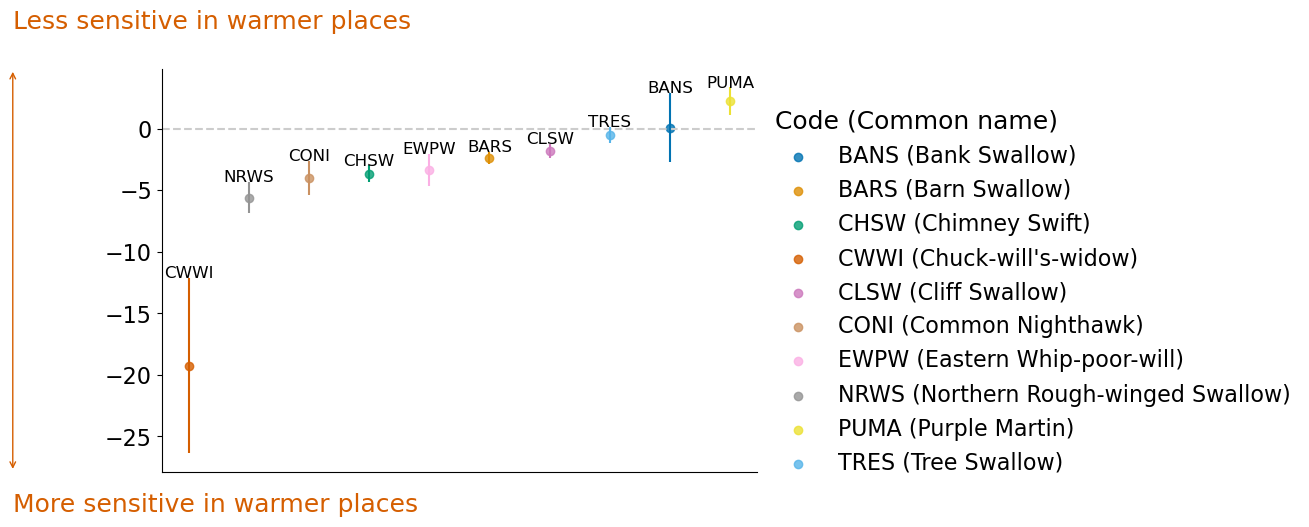

In [80]:
# sns.set(rc={'figure.figsize':(8.3325*2, 5)})

predictor_variable = 'rank'

column_name = 'slope'

column_name_lower_conf_int = 'lower_conf_int'

column_name_upper_conf_int = 'upper_conf_int'

g = sns.lmplot(data=df_betas_sens_temp, x=predictor_variable, y=column_name, hue='code_common_name', fit_reg=False, 
                palette='colorblind', height=4.76, aspect=1.5)

g.set(xlabel=None)

g._legend.set_title('Code (Common name)')

plt.setp(g._legend.get_title(), fontsize=18)

# plt.setp(g._legend.get_texts(), fontsize=16)

sns.move_legend(g, 'center right', bbox_to_anchor=(1.2, 0.5), fontsize=16, alignment='left')

g.tick_params(bottom=False, labelbottom=False, labelsize=16)

plt.axhline(y=0, color='0.8', linestyle='--')

right = df_betas_sens_temp[column_name_upper_conf_int] - df_betas_sens_temp[column_name]

plt.errorbar(x=df_betas_sens_temp[predictor_variable], y=df_betas_sens_temp[column_name], 
             yerr=[df_betas_sens_temp[column_name] - df_betas_sens_temp[column_name_lower_conf_int], right], 
             linestyle='', 
             ecolor=sns.color_palette('colorblind').as_hex())

for i, code in enumerate(df_betas_sens_temp['species_code']):
    plt.annotate(code, (df_betas_sens_temp['rank'].iloc[i], df_betas_sens_temp['upper_conf_int'].iloc[i]), 
                 ha='center', fontsize=12) #  + 0.4

# plt.ylabel('Change\nin\nsensitivity\nwith\ntemperature\nchange\nover\ntime', rotation=0, ha='right')

g.set(ylabel=None)

plt.annotate('', xy=(-0.25, 0), xycoords='axes fraction', xytext=(-0.25, 1), 
        arrowprops=dict(arrowstyle='<->', color=sns.color_palette('colorblind').as_hex()[3]))


# plt.annotate('', xy=(4, 0), xycoords='axes points', xytext=(4, 20), 
#         arrowprops=dict(arrowstyle='<->', color=sns.color_palette('colorblind').as_hex()[3]))

# ax.annotate('pixel offset from axes fraction',
#             xy=(1, 0), xycoords='axes fraction',
#             xytext=(-20, 20), textcoords='offset pixels',
#             horizontalalignment='right',
#             verticalalignment='bottom')


plt.annotate('More sensitive in warmer places', xy=(-0.25, 0), xycoords='axes fraction', 
             xytext=(-0.25, -0.1), 
             ha='left', color=sns.color_palette('colorblind').as_hex()[3], fontsize=18)

plt.annotate('Less sensitive in warmer places', xy=(-0.25, 1), xycoords='axes fraction', 
             xytext=(-0.25, 1.1), ha='left', 
             color=sns.color_palette('colorblind').as_hex()[3], fontsize=18)

print(g.figure.get_size_inches())

plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/sensitivity_temperature.pdf', bbox_inches='tight')

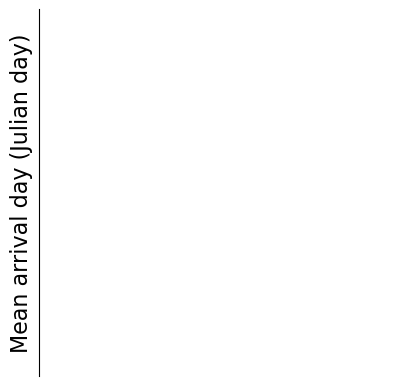

In [76]:
fig, ax = plt.subplots(figsize=(4.76, 4.76))
plt.plot([0, 1], [1, 0], linewidth=0)
plt.xticks([])
plt.yticks([])
ax.spines[['right', 'top', 'bottom']].set_visible(False)
plt.ylabel('Mean arrival day (Julian day)', fontsize=16)

# plt.show()

plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/mean_arrival_day.pdf')

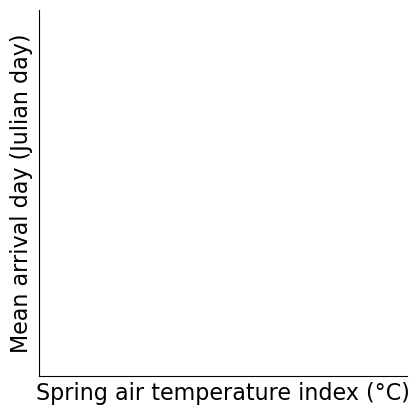

In [77]:
fig, ax = plt.subplots(figsize=(4.76, 4.76))
plt.plot([0, 1], [1, 0], linewidth=0)
plt.xticks([])
plt.yticks([])
ax.spines[['right', 'top']].set_visible(False)
plt.xlabel('Spring air temperature index (°C)', fontsize=16)
plt.ylabel('Mean arrival day (Julian day)', fontsize=16)

# plt.show()

plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/mean_arrival_day_spring_air_temperature_index.pdf')

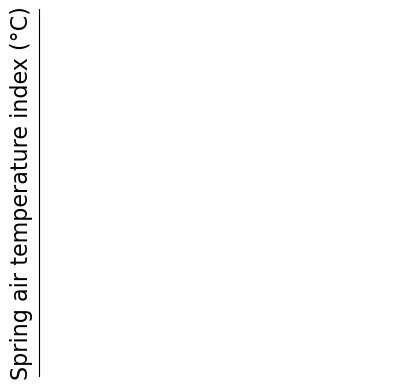

In [78]:
fig, ax = plt.subplots(figsize=(4.76, 4.76))
plt.plot([0, 1], [1, 0], linewidth=0)
plt.xticks([])
plt.yticks([])
ax.spines[['right', 'top', 'bottom']].set_visible(False)
plt.ylabel('Spring air temperature index (°C)', fontsize=16)

# plt.show()

plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/spring_air_temperature_index.pdf')

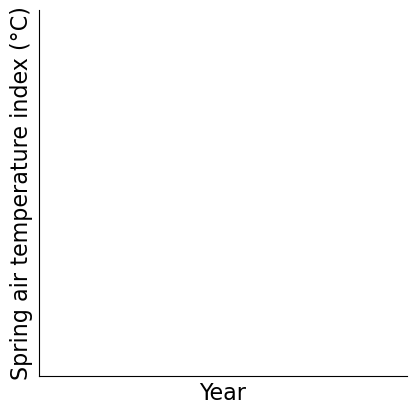

In [79]:
fig, ax = plt.subplots(figsize=(4.76, 4.76))
plt.plot([0, 1], [1, 0], linewidth=0)
plt.xticks([])
plt.yticks([])
ax.spines[['right', 'top']].set_visible(False)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Spring air temperature index (°C)', fontsize=16)

# plt.show()

plt.savefig('/Users/alvastrand/Downloads/AOS_2023/Figures/spring_air_temperature_index_year.pdf')

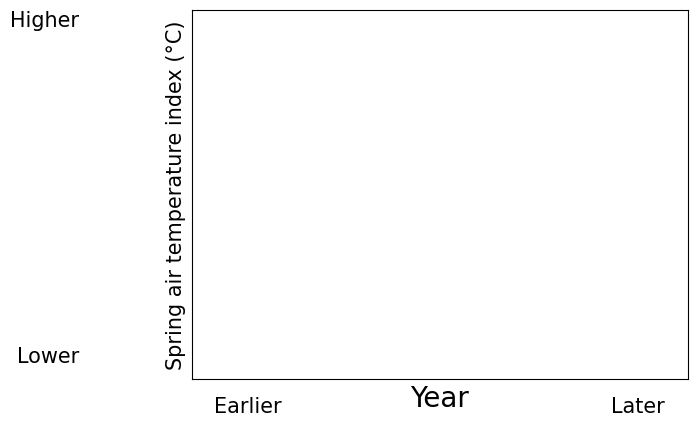

In [58]:
line = plt.plot([0, 1], [-1, 1])
line = line.pop(0)
line.remove()
plt.xticks([])
plt.yticks([])
plt.xlabel('Year', fontsize=20)
plt.ylabel('Spring air temperature index (°C)', fontsize=15)
plt.text(-0.3, 1, 'Higher', horizontalalignment='right', fontsize=15)
plt.text(-0.3, -1, 'Lower', horizontalalignment='right', fontsize=15)
plt.text(0, -1.3, 'Earlier', fontsize=15)
plt.text(1, -1.3, 'Later', horizontalalignment='right', fontsize=15)
plt.show()

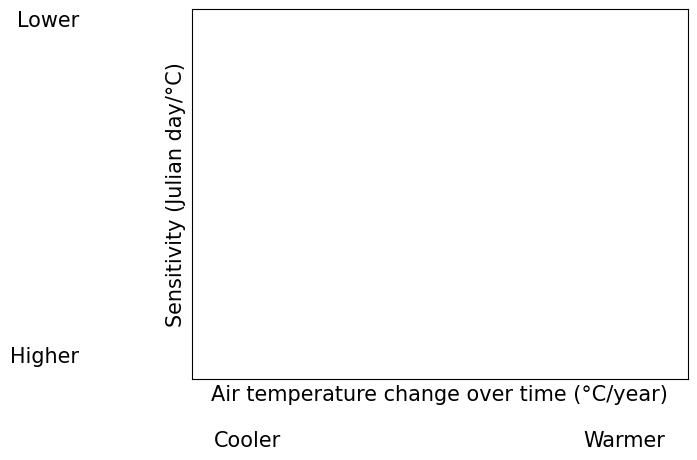

In [59]:
line = plt.plot([0, 1], [-1, 1])
line = line.pop(0)
line.remove()
plt.xticks([])
plt.yticks([])
plt.xlabel('Air temperature change over time (°C/year)', fontsize=15)
plt.ylabel('Sensitivity (Julian day/°C)', fontsize=15)
plt.text(-0.3, 1, 'Lower', horizontalalignment='right', fontsize=15)
plt.text(-0.3, -1, 'Higher', horizontalalignment='right', fontsize=15)
plt.text(0, -1.5, 'Cooler', fontsize=15)
plt.text(1, -1.5, 'Warmer', horizontalalignment='right', fontsize=15)
plt.show()

AttributeError: 'Line2D' object has no attribute 'spines'

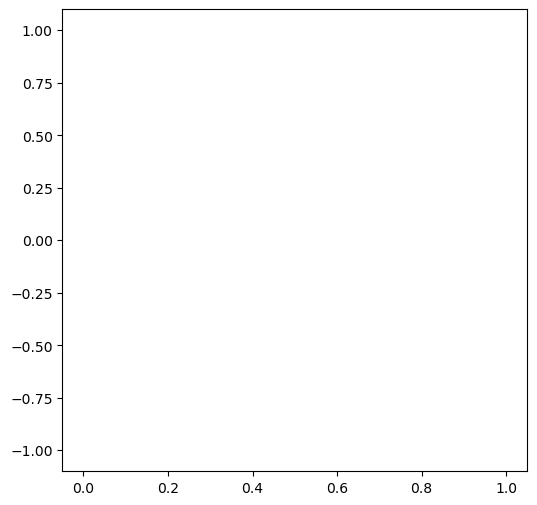

In [60]:
fig, ax = plt.subplots(figsize=(6, 6))

line = plt.plot([0, 1], [-1, 1])
line = line.pop(0)
line.remove()

line.spines['right'].set_visible(False)

plt.xticks([])
plt.yticks([])
plt.xlabel('Functional trait', fontsize=18)
plt.ylabel('Sensitivity (Julian day/°C)', fontsize=18)
# plt.text(-0.3, 1, 'Lower', horizontalalignment='right', fontsize=15)
# plt.text(-0.3, -1, 'Higher', horizontalalignment='right', fontsize=15)
plt.show()